<a href="https://colab.research.google.com/github/Seba4341/ECON-441-B-/blob/main/Week6_441Bipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [61]:

df = pd.read_csv("/content/drive/MyDrive/ECON425 ML/CLV.csv", index_col=0)


In [62]:
df

,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [64]:
y = df['Customer Lifetime Value']
X= df.drop('Customer Lifetime Value',axis='columns')


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state=10)


In [66]:
scaler=StandardScaler()


In [67]:
X_train=scaler.fit_transform(X_train)


In [68]:
X_test=scaler.fit_transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [47]:

MLPRegressor?

In [50]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','logistic','tanh', 'relu'],
    "max_iter" : [100,200,50],
    "alpha":[0.0001,0.001]
}

In [51]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (20, 5)],
                         'max_iter': [100, 200, 50]})

In [52]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 5), 'max_iter': 200}


# 3.) Train a model with the optimal solution from GridSearch

In [53]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(20, 5))

In [56]:
p_dict = {'activation': 'relu', 
          'alpha': 0.0001, 
          'hidden_layer_sizes': (20, 5), 
          'max_iter': 200}

reg2=MLPRegressor(**p_dict)


In [57]:
reg2

MLPRegressor(hidden_layer_sizes=(20, 5))

# 4.) What are the in-sample and out of sample MSEs

In [70]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [71]:
# predict on the training set and calculate Sample MSE
y_pred_train = clf.predict(X_train)
sample_mse = mean_squared_error(y_train, y_pred_train)
print(f"Sample MSE: {sample_mse:.4f}")

# predict on the test set and calculate Out-of-Sample MSE
y_pred_test = clf.predict(X_test)
oos_mse = mean_squared_error(y_test, y_pred_test)
print(f"Out-of-Sample MSE: {oos_mse:.4f}")

Sample MSE: 47561418.1688
Out-of-Sample MSE: 47737598.5588


# 5.) Build a Keras with the architecture defined by GridSearchCV


In [72]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [74]:
model=Sequential()
model.add(Dense(12,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='softmax'))

In [79]:
model.compile(loss='mse',optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
200/200 [==============================] - 2s 2ms/step - loss: 111508456.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 111508424.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 111508488.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 111508464.0000
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 111508464.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 111508472.0000
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 111508432.0000
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 111508464.0000
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 111508488.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 111508440.0000
Epoch 11/100
200/200 [==============================] - 0s 1ms/step - loss: 111508472.0000
Epoch 12

In [80]:

keras.models.save_model(model, "/content/model.pb")

In [81]:


mod = keras.models.load_model("/content/model.pb")

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [82]:

from tensorflow.keras.utils import plot_model

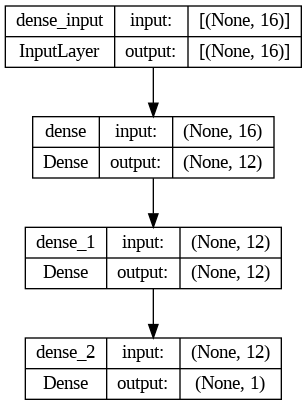

In [83]:
plot_model(model, show_shapes = True)

In [84]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=229dc7bf18eaff043924b7eac2cac700116d8b41058bb0f475d207631a434c94
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [85]:

!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [86]:

filename = "/content/model24feb.png"

In [87]:
from ann_visualizer.visualize import ann_viz

In [88]:
ann_viz(model, title="CLV NN Viz", filename="/content/model24feb.png")

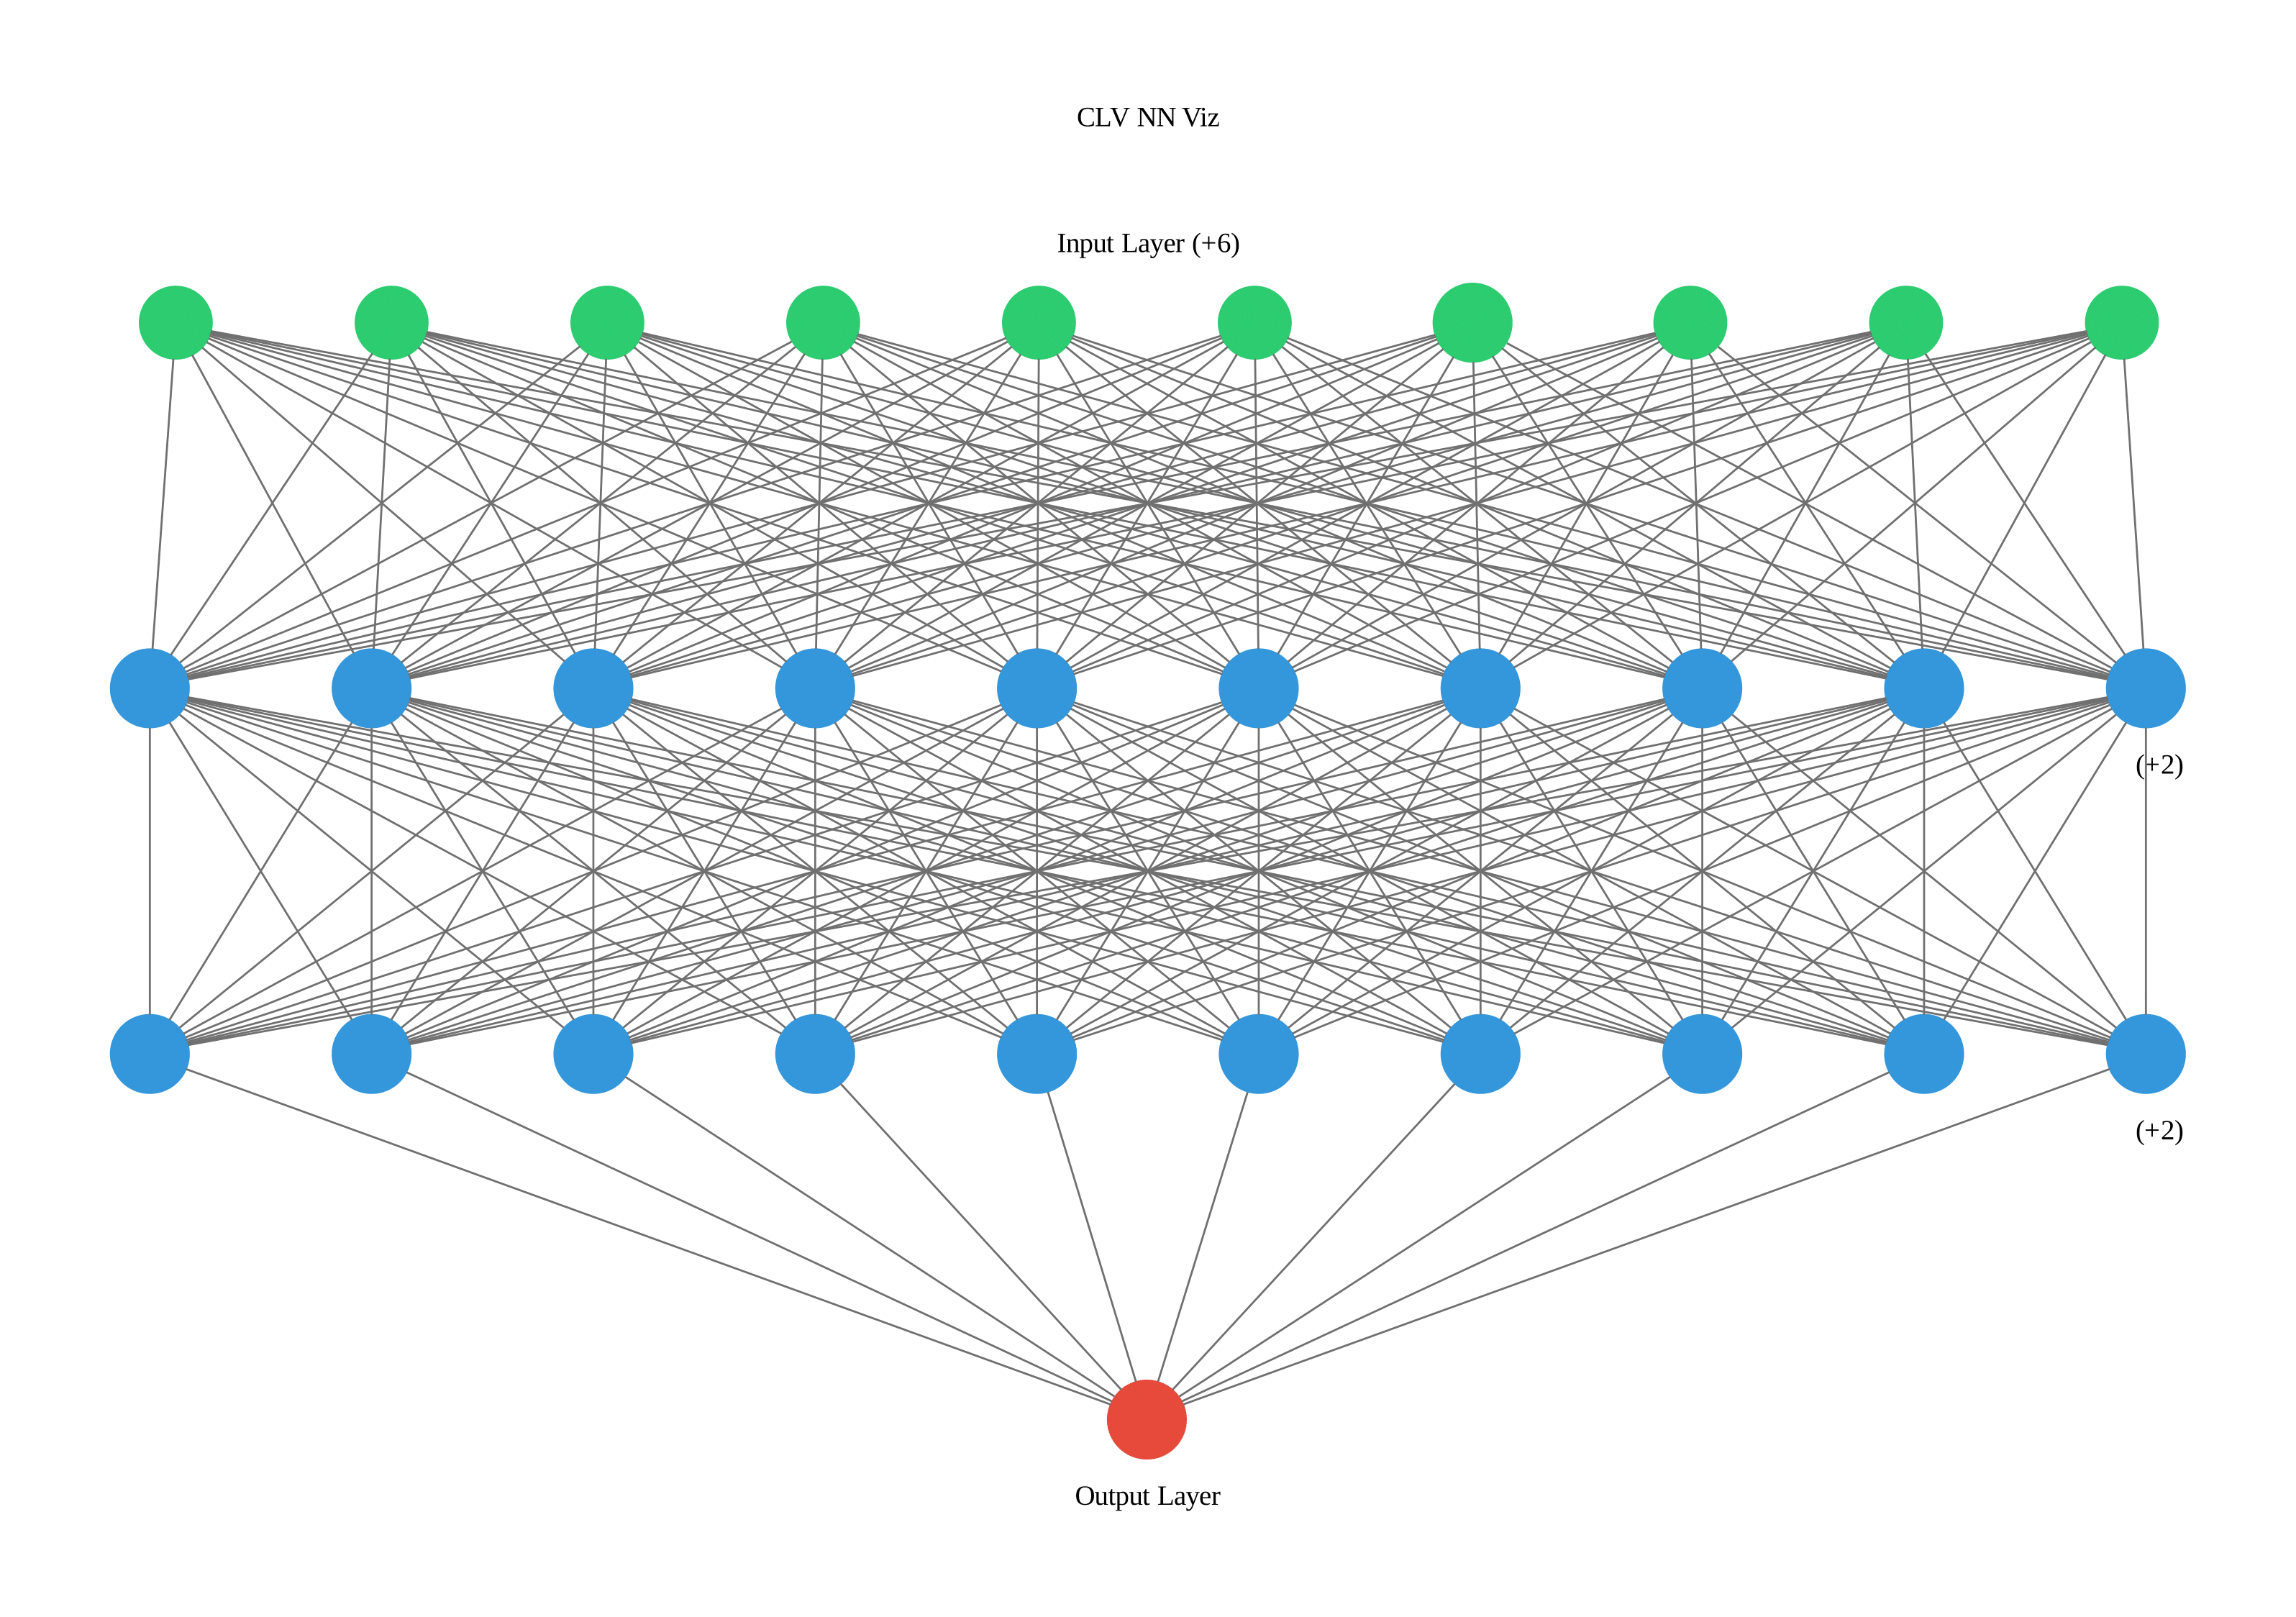

In [102]:

from IPython.display import Image
Image(filename = "/content/drive/MyDrive/ECON425 ML/model24feb.png-1.png")